#시작

##코랩 연동

GPU로 다시 돌릴것

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import random

import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 데이터 불러오기

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/data/sample_submission.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [ ]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


## null 값 확인

In [ ]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [ ]:
test.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

## 신용점수와 비교

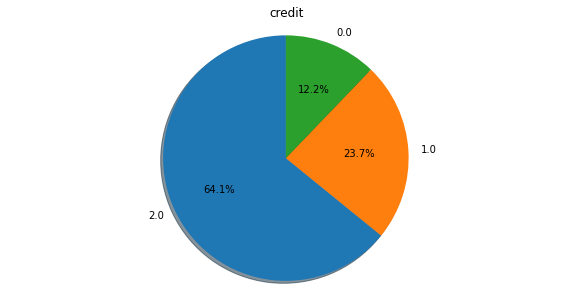

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(train['credit'].value_counts(),labels = train['credit'].value_counts().index,
        autopct='%0.1f%%', shadow = True, startangle=90) 
plt.title("credit")
plt.axis('equal')
plt.show()

In [ ]:
train_0 = train[train['credit']==0.0]
train_1 = train[train['credit']==1.0]
train_2 = train[train['credit']==2.0]

In [ ]:
def chart(feature):

  sns.set_style('whitegrid')

  plt.figure(figsize = (17,10))
  p1 = plt.subplot(1,3,1)
  graph1 = sns.countplot(x= feature, palette='Set1', data= train_0, order = train_0[feature].value_counts().index)
  plt.title("credit_0")


  p2 = plt.subplot(1,3,2)
  graph2 = sns.countplot(x= feature, palette='Set1',  data= train_1, order = train_1[feature].value_counts().index)
  plt.title("credit_1")


  p3 = plt.subplot(1,3,3)
  graph3 = sns.countplot(x= feature, palette='Set1',  data= train_2, order = train_2[feature].value_counts().index)
  plt.title("credit_2")
  

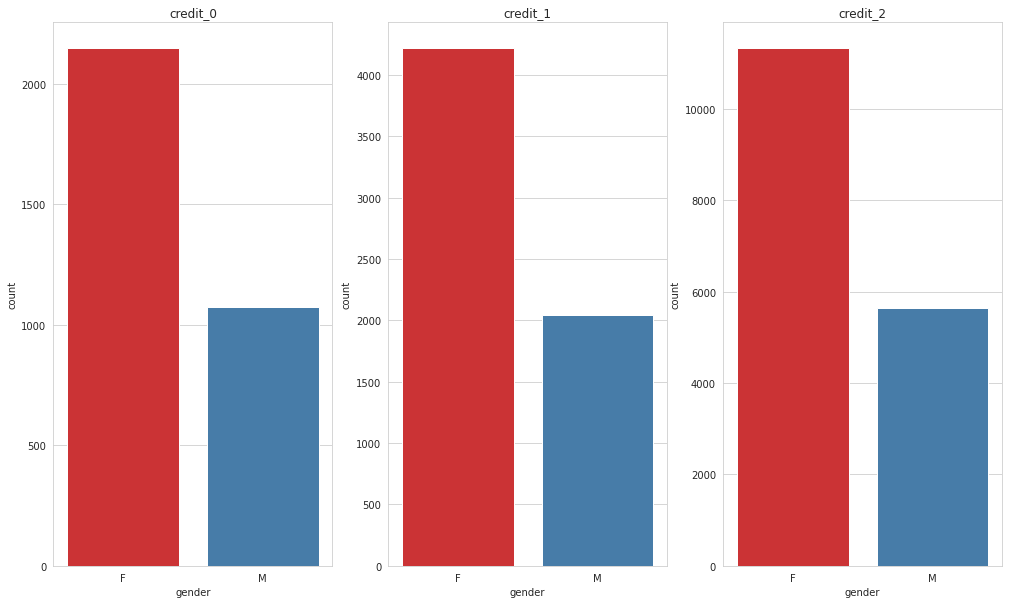

In [ ]:
#성별
chart('gender')

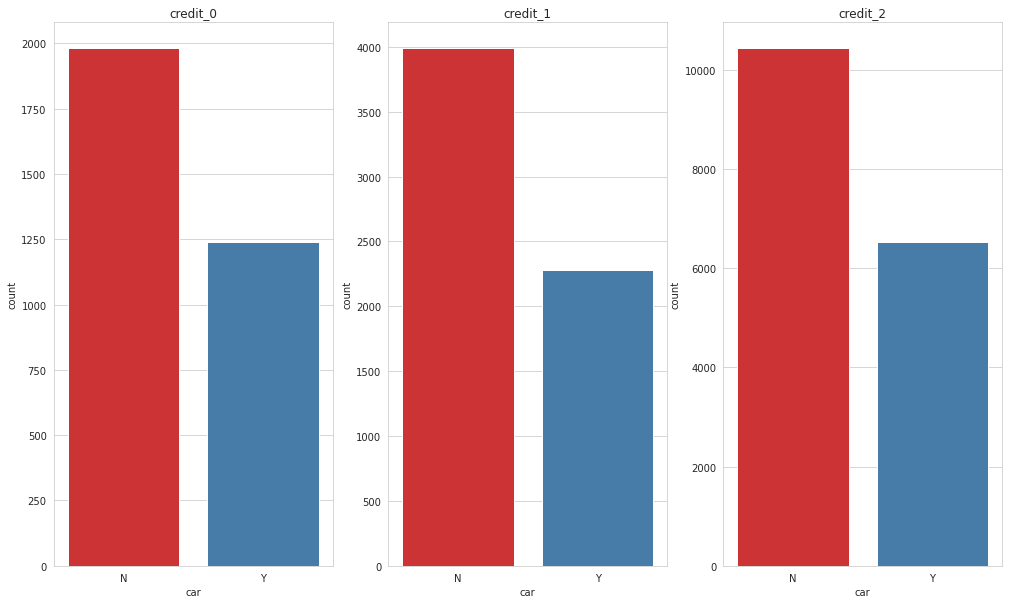

In [ ]:
#자동차 소유 유무
chart('car')

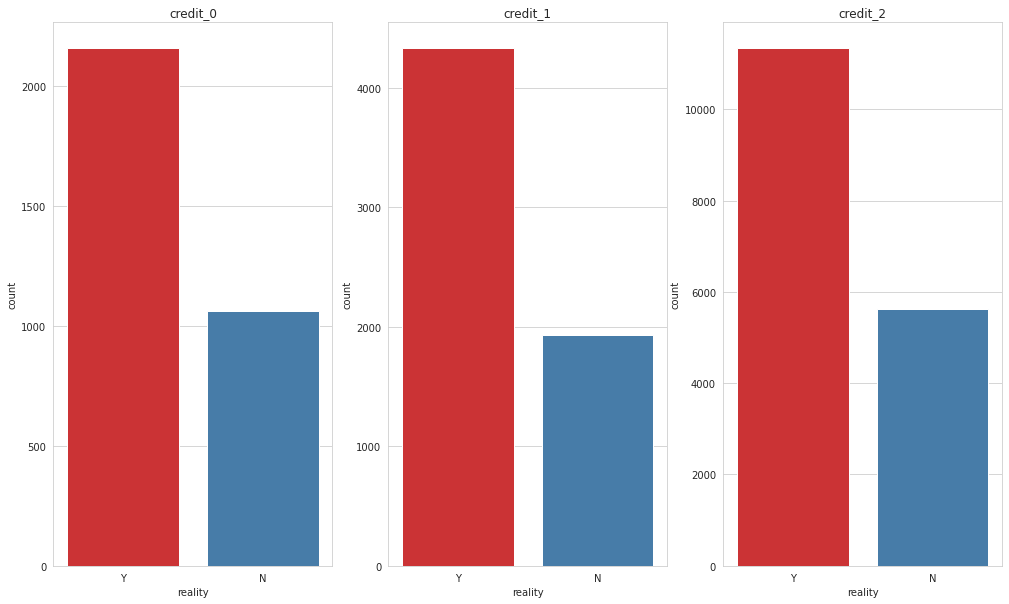

In [ ]:
#부동산 소유 여부
chart('reality')

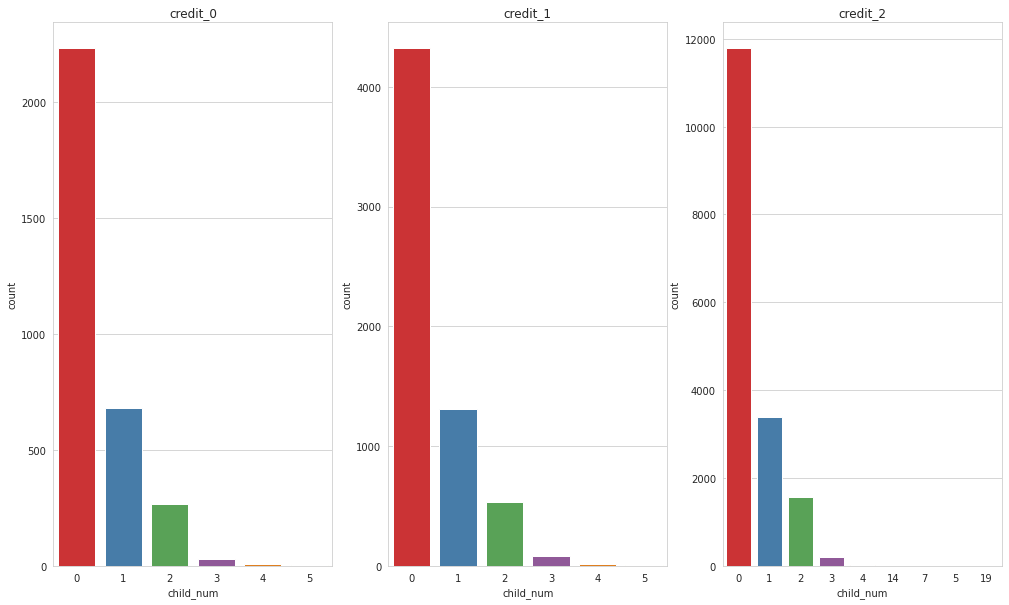

In [ ]:
# 자녀 수
chart('child_num')

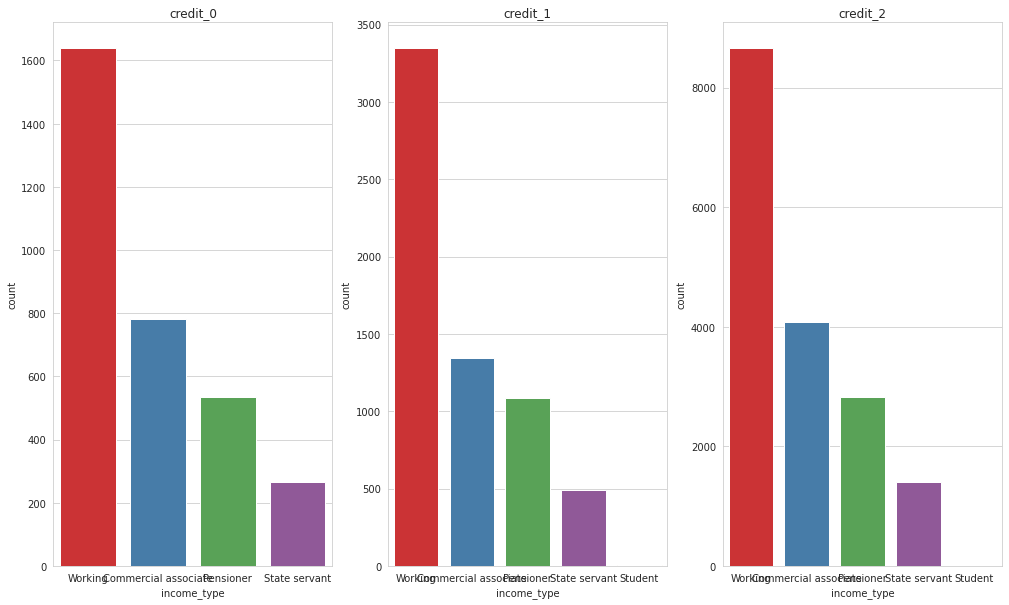

In [ ]:
# 소득 유형
chart('income_type')

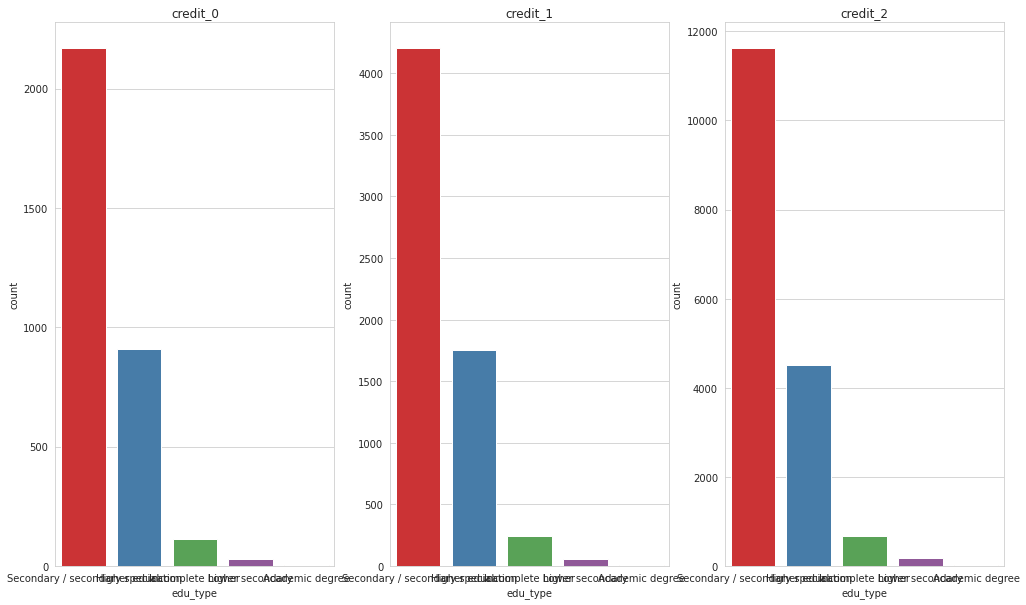

In [ ]:
# 교육 유형
chart('edu_type')

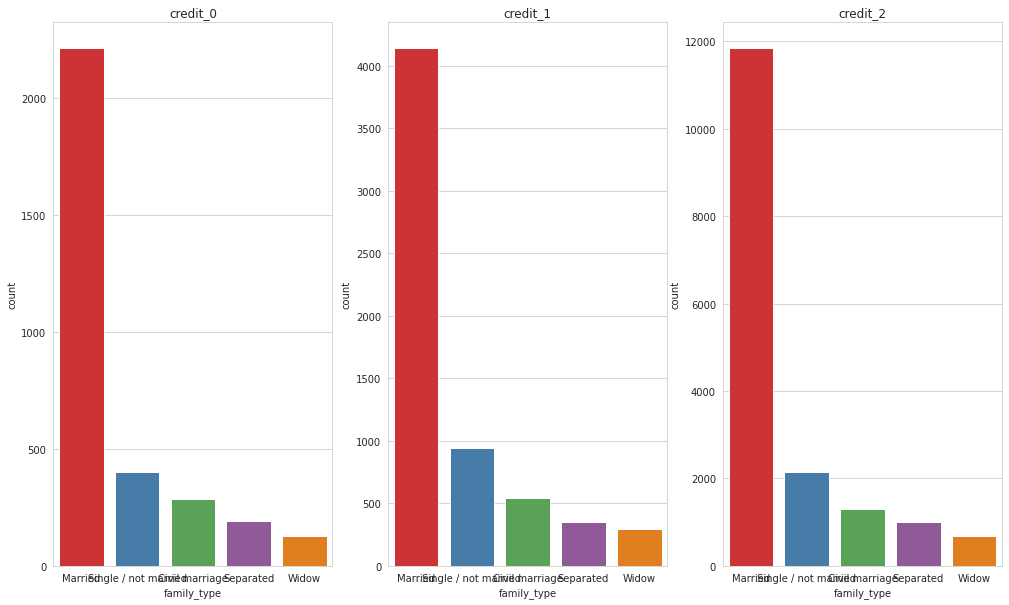

In [ ]:
# 가족 유형
chart('family_type')

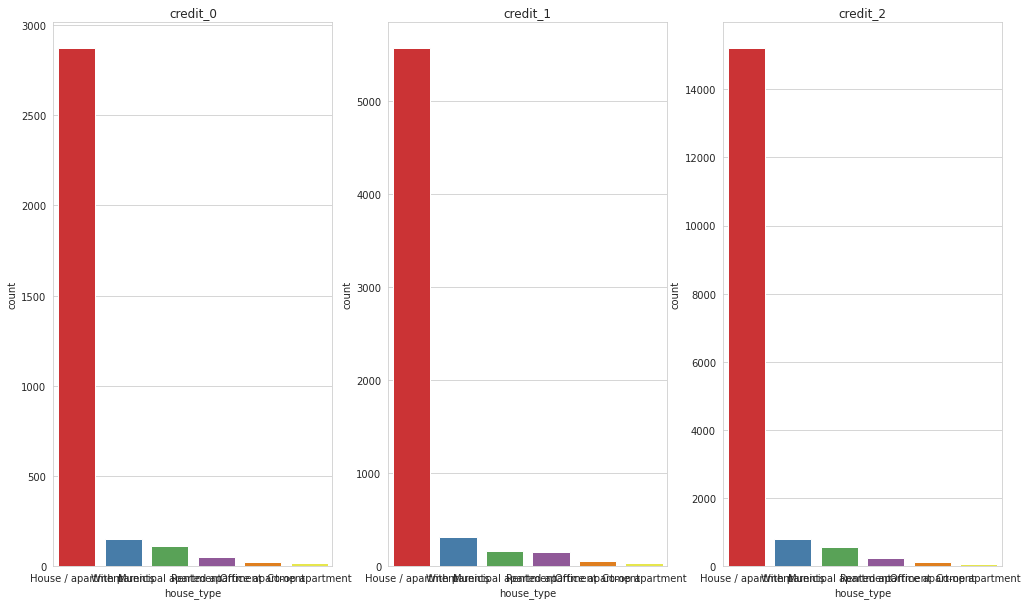

In [ ]:
# 거주 유형
chart('house_type')

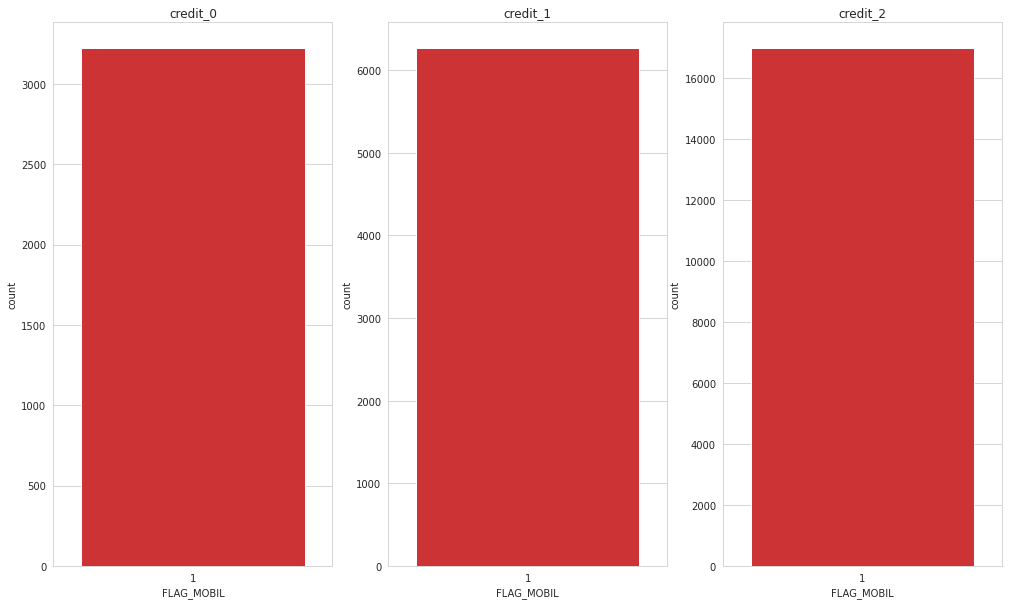

In [ ]:
# 휴대폰
chart('FLAG_MOBIL')

# 이 결과로 보면 휴대폰은 모두 가지고 있음

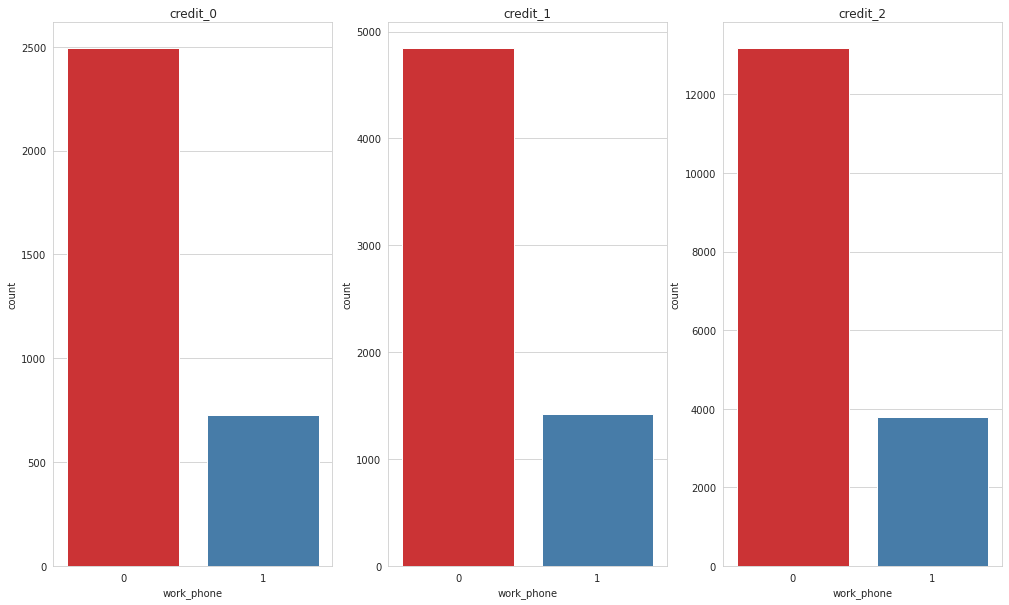

In [ ]:
# 업무용 휴대폰
chart('work_phone')

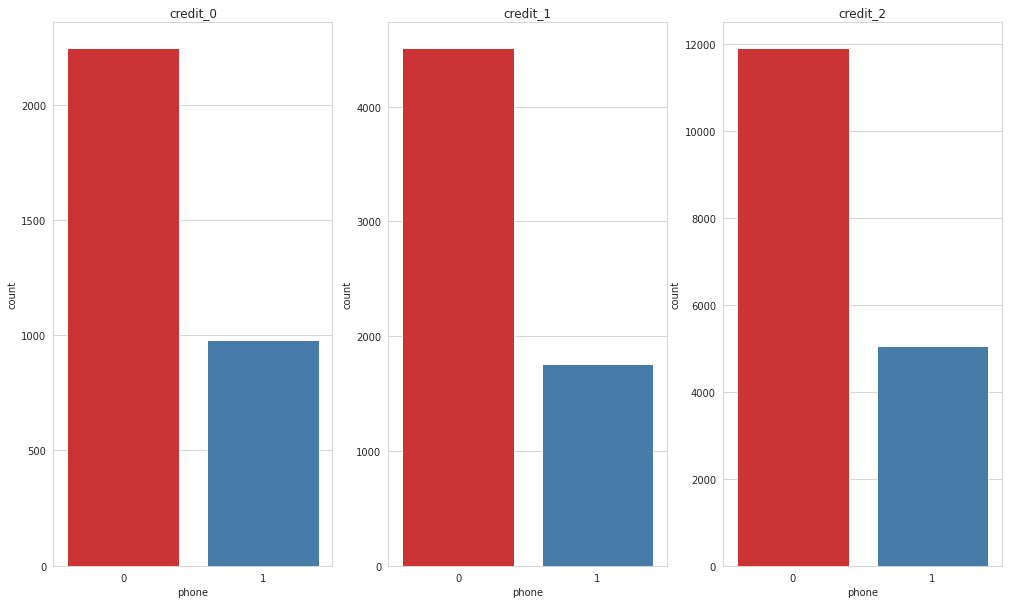

In [ ]:
# 가정용 전화기
chart('phone')

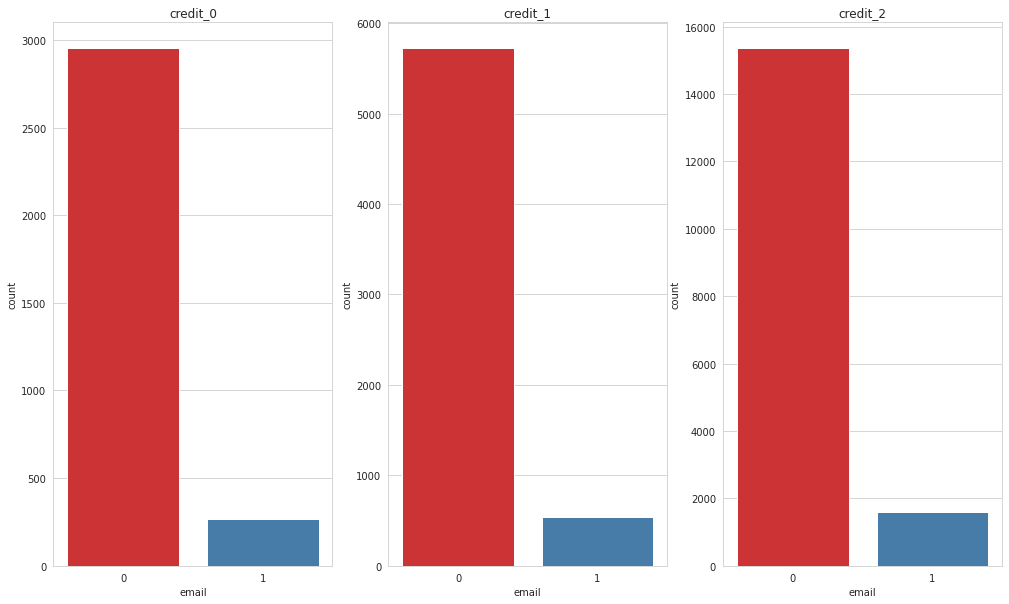

In [ ]:
# 이메일
chart('email')

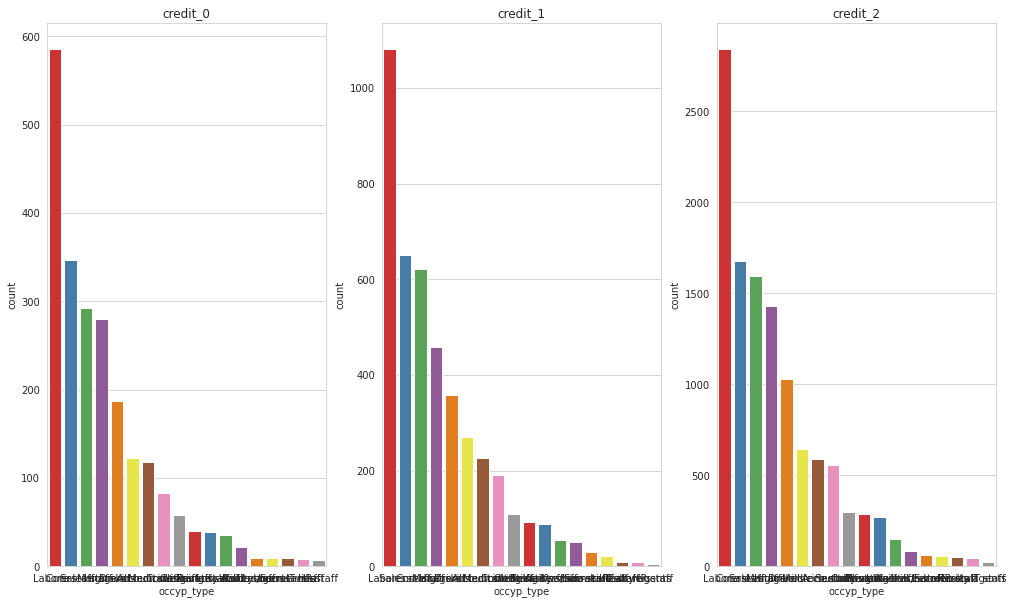

In [ ]:
chart('occyp_type')

# 유형이 많아 보기 힘듬

Text(0.5, 1.0, 'credit_2')

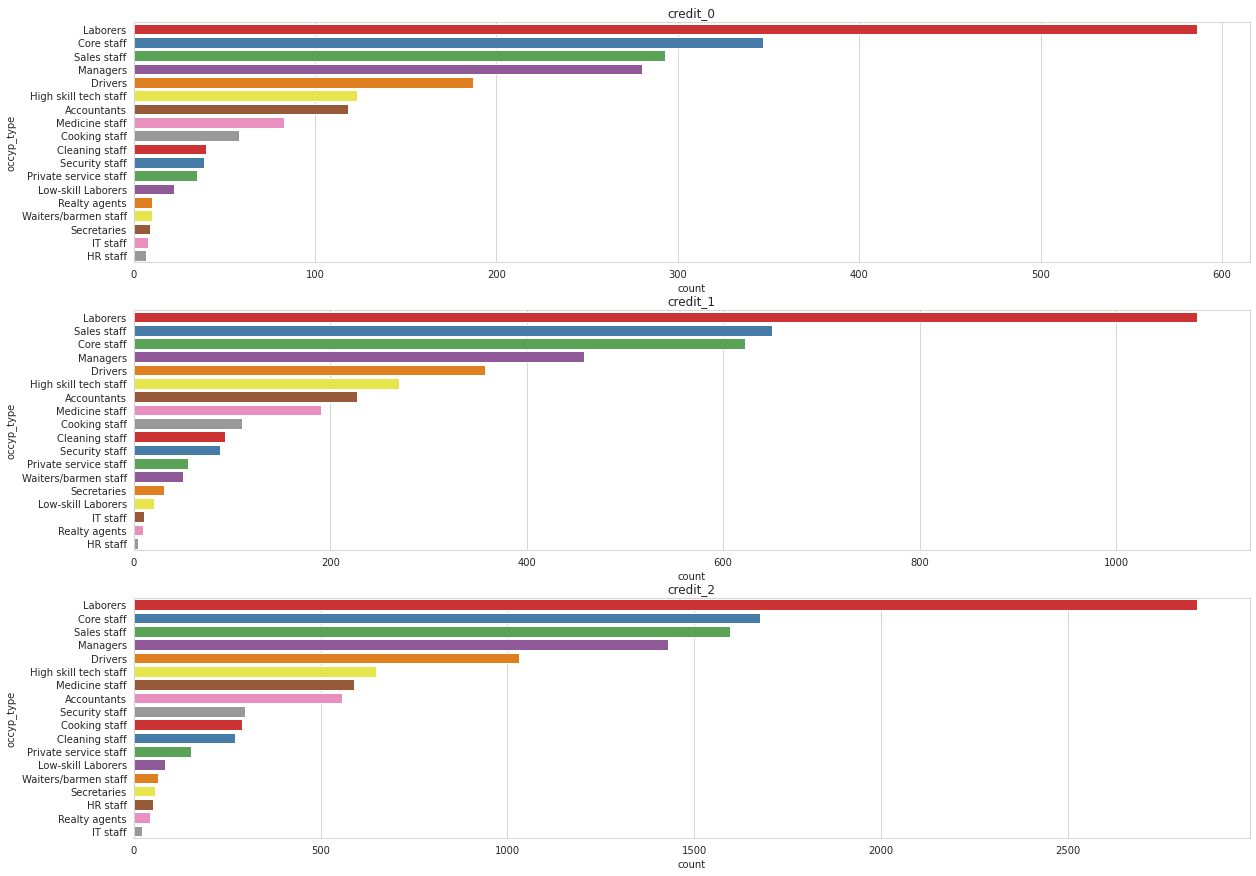

In [ ]:
sns.set_style('whitegrid')

plt.figure(figsize = (20,15))

p1 = plt.subplot(3,1,1)
graph1 = sns.countplot(y= train_0['occyp_type'],  palette='Set1', data= train_0, order = train_0['occyp_type'].value_counts().index)
plt.title("credit_0")

p2 = plt.subplot(3,1,2)
graph2 = sns.countplot(y= train_1['occyp_type'], palette='Set1',  data= train_1, order = train_1['occyp_type'].value_counts().index)
plt.title("credit_1")

p3 = plt.subplot(3,1,3)
graph3 = sns.countplot(y= train_2['occyp_type'],  palette='Set1',  data= train_2, order = train_2['occyp_type'].value_counts().index)
plt.title("credit_2")

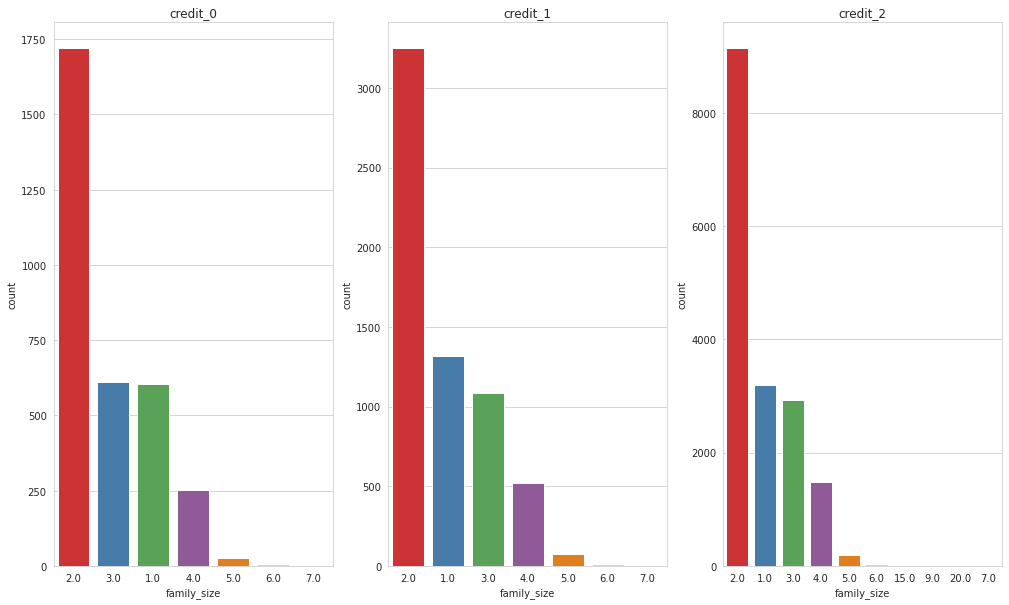

In [ ]:
# 가족 크기
chart('family_size')


```
           

*   이상치들이 종종 존재하여 이상치 제거를 할 필요가 있음
*   휴대폰은 모두다 가지고 있어 의미없으므로 제거할 필요가 있음
*   신용점수 0점과 1점, 2점 모두 비슷한 분포를 가지고 있음

```



## DAYS_BIRTH & drop

In [ ]:
def histo(feature):
  plt.hist(x=train[feature])
  plt.figure(figsize=(17,10))
  plt.show()

In [ ]:
def days_to_age(x):
  return (x*-1)/365

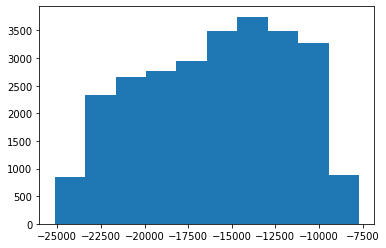

<Figure size 1224x720 with 0 Axes>

In [ ]:
histo('DAYS_BIRTH')

#태어난 날이 그날로부터 -로 찍혀있어 실제 나이로 변환해야함

In [ ]:
train['DAYS_BIRTH'] = train['DAYS_BIRTH'].apply(days_to_age)
test['DAYS_BIRTH'] = test['DAYS_BIRTH'].apply(days_to_age)

In [ ]:
train = train.drop(['FLAG_MOBIL'], axis = 1)
test = test.drop(['FLAG_MOBIL'], axis = 1)

In [ ]:
train['occyp_type'] = train['occyp_type'].fillna('Etc')
test['occyp_type'] = test['occyp_type'].fillna('Etc')

## DAYS_EMPLOYED

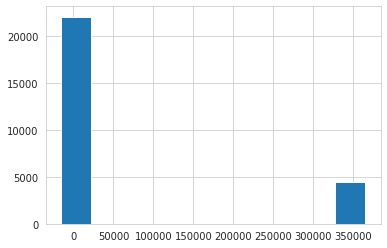

<Figure size 1224x720 with 0 Axes>

In [ ]:
histo('DAYS_EMPLOYED')

In [ ]:
train['DAYS_EMPLOYED'] = -train['DAYS_EMPLOYED']
test['DAYS_EMPLOYED'] = -test['DAYS_EMPLOYED']

In [ ]:
def days_to_year(x):
  return (x/365)

In [ ]:
# 일한 날짜를 연단위로 변환

train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].apply(days_to_year)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].apply(days_to_year)

In [ ]:
# 양수값들은 고용되지 않은 상태라 -1을 넣었음

train.loc[train['DAYS_EMPLOYED'] < 0, 'DAYS_EMPLOYED'] = -1
test.loc[test['DAYS_EMPLOYED'] < 0 , 'DAYS_EMPLOYED'] = -1

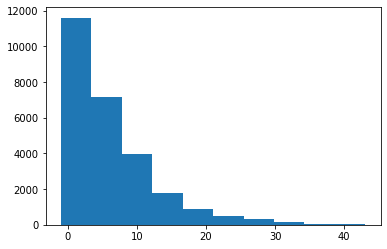

<Figure size 1224x720 with 0 Axes>

In [ ]:
histo('DAYS_EMPLOYED')

## begin_month & 중복 이슈


In [ ]:
train[train.drop(["index","begin_month"], axis = 1).duplicated(keep = False)].sort_values(["income_total","DAYS_BIRTH","index","begin_month"]).head(20)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
1030,1030,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,55.030137,-1.000000,1,0,0,0,Etc,2.0,-6.0,1.0
4797,4797,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,55.030137,-1.000000,1,0,0,0,Etc,2.0,-2.0,1.0
15900,15900,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,55.030137,-1.000000,1,0,0,0,Etc,2.0,-27.0,1.0
18054,18054,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,55.030137,-1.000000,1,0,0,0,Etc,2.0,-24.0,1.0
3172,3172,M,N,Y,0,30150.0,Pensioner,Lower secondary,Married,House / apartment,65.123288,-1.000000,1,0,0,0,Etc,2.0,-39.0,2.0
22938,22938,M,N,Y,0,30150.0,Pensioner,Lower secondary,Married,House / apartment,65.123288,-1.000000,1,0,0,0,Etc,2.0,-10.0,2.0
1111,1111,F,Y,N,0,31500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,48.663014,21.189041,1,1,1,0,Cleaning staff,2.0,-33.0,2.0
2251,2251,F,Y,N,0,31500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,48.663014,21.189041,1,1,1,0,Cleaning staff,2.0,-20.0,2.0
5784,5784,F,Y,N,0,31500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,48.663014,21.189041,1,1,1,0,Cleaning staff,2.0,-34.0,2.0
11004,11004,F,Y,N,0,31500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,48.663014,21.189041,1,1,1,0,Cleaning staff,2.0,-34.0,1.0


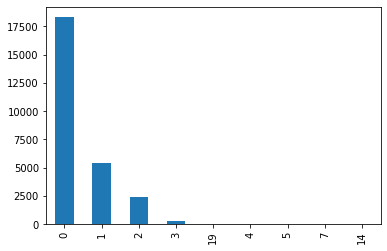

In [ ]:
train['child_num'].value_counts(sort=False).plot.bar()

In [ ]:
train.loc[train['child_num'] >= 2,'child_num']=2
test.loc[test['child_num']>=2, 'child_num']=2

In [ ]:
count, bin_dividers =np.histogram(train['income_total'], bins=7)
bin_names=[int(i) for i in range(7) ]
train['income_total']=pd.cut(x=train['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)

In [ ]:
count, bin_dividers =np.histogram(test['income_total'], bins=7)
bin_names=[int(i) for i in range(7) ]
test['income_total']=pd.cut(x=test['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)

### 수업을 듣고나서 원핫인코딩 추가 고민

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  float64
 11  DAYS_EMPLOYED  26457 non-null  float64
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     26457 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [ ]:
#CategoricalEncoder 개발자가 release 더이상 안해서 불러올 수 없음

from sklearn.preprocessing import CategoricalEncoder

en = CategoricalEncoder()
train_reshaped = train['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type'].values.reshape(-1,1)
train_1hot = en.fit_transform(train_reshaped)
train_1hot
#Encod.fit_transform(train)

ImportError: ignored

In [ ]:
train1=train.drop(['gender','car','reality','income_type','edu_type','family_type', 'house_type','occyp_type'], axis=1)
test1=test.drop(['gender','car','reality','income_type','edu_type','family_type', 'house_type','occyp_type'], axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
en = OneHotEncoder()
target_col = ['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type']
en.fit(train.loc[:,target_col])
train2 = pd.DataFrame(en.transform(train[target_col]).toarray(), 
             columns=en.get_feature_names(target_col))

train2.head()

,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Etc,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
target_col = ['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type']
en.fit(test.loc[:,target_col])
test2 = pd.DataFrame(en.transform(test[target_col]).toarray(), 
             columns=en.get_feature_names(target_col))

test2.head()

,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Etc,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
 ftrain = pd.concat([train1, train2],axis=1)
 ftest = pd.concat([test1, test2], axis=1)

In [ ]:
print(ftrain.shape)
print(ftest.shape)

(26457, 57)
(10000, 56)


In [ ]:
ftrain = ftrain.drop('index',axis=1)
ftest = ftest.drop('index',axis=1)

In [ ]:
ftrain

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Etc,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,202500.0,38.079452,12.901370,0,0,0,2.0,-6.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,247500.0,31.178082,4.219178,0,0,1,3.0,-5.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,450000.0,52.293151,12.147945,0,1,0,2.0,-22.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,202500.0,41.336986,5.731507,0,1,0,2.0,-37.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,157500.0,41.197260,5.767123,0,0,0,2.0,-26.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,2,225000.0,33.093151,5.435616,0,0,0,4.0,-2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26453,1,180000.0,41.893151,6.780822,0,0,0,2.0,-47.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26454,0,292500.0,27.621918,5.520548,0,0,0,2.0,-25.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26455,0,171000.0,27.794521,0.293151,0,0,0,1.0,-59.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 원핫인코딩 후 다시

In [ ]:
##원핫인코딩 안할시
ftrain = train
ftest = test

(25451.999, 248142.857]       21601
(248142.857, 469285.714]       4462
(469285.714, 690428.571]        305
(690428.571, 911571.429]         71
(911571.429, 1132714.286]         9
(1132714.286, 1353857.143]        4
(1353857.143, 1575000.0]          5
Name: income_total, dtype: int64


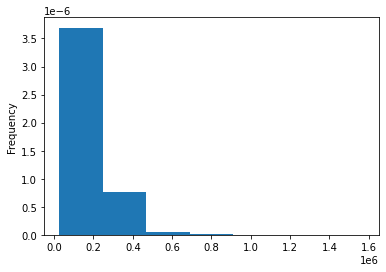

In [ ]:
print(train['income_total'].value_counts(bins=7,sort=False))
train['income_total'].plot(kind='hist',bins=7,density=True)

In [ ]:
count, bin_dividers =np.histogram(ftrain['income_total'], bins=7)
bin_names=[int(i) for i in range(7) ]
ftrain['income_total']=pd.cut(x=ftrain['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)

NameError: ignored

In [ ]:
count, bin_dividers =np.histogram(ftest['income_total'], bins=7)
bin_names=[int(i) for i in range(7) ]
ftest['income_total']=pd.cut(x=ftest['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)

(21.061, 29.076]    2967
(29.076, 37.043]    5819
(37.043, 45.01]     6104
(45.01, 52.976]     4818
(52.976, 60.943]    4560
(60.943, 68.91]     2189
Name: DAYS_BIRTH, dtype: int64


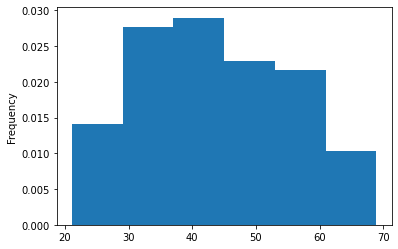

In [ ]:
print(train['DAYS_BIRTH'].value_counts(bins=6,sort=False))
train['DAYS_BIRTH'].plot(kind='hist',bins=6,density=True)

In [ ]:
count, bin_dividers =np.histogram(ftrain['DAYS_BIRTH'], bins=6)
bin_names=[int(i) for i in range(6) ]
ftrain['DAYS_BIRTH']=pd.cut(x=ftrain['DAYS_BIRTH'], bins=bin_dividers, labels=bin_names, include_lowest=True)

In [ ]:
count, bin_dividers =np.histogram(ftest['DAYS_BIRTH'], bins=6)
bin_names=[int(i) for i in range(6) ]
ftest['DAYS_BIRTH']=pd.cut(x=ftest['DAYS_BIRTH'], bins=bin_dividers, labels=bin_names, include_lowest=True)

(-1.045, 5.293]     15278
(5.293, 11.586]      7109
(11.586, 17.878]     2378
(17.878, 24.171]     1038
(24.171, 30.464]      446
(30.464, 36.757]      155
(36.757, 43.049]       53
Name: DAYS_EMPLOYED, dtype: int64


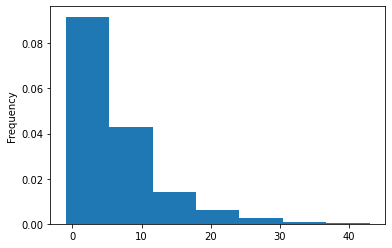

In [ ]:
print(ftrain['DAYS_EMPLOYED'].value_counts(bins=7,sort=False))
ftrain['DAYS_EMPLOYED'].plot(kind='hist',bins=7,density=True)

In [ ]:
train_x=ftrain.drop('credit', axis=1)
train_y=ftrain[['credit']]
test_x=ftest

## Try

In [ ]:
ftrain.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Etc,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,0,2,12.901370,0,0,0,2.0,-6.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1,4.219178,0,0,1,3.0,-5.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,3,12.147945,0,1,0,2.0,-22.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,2,5.731507,0,1,0,2.0,-37.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,2,5.767123,0,0,0,2.0,-26.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
!pip uninstall -y typing # this should avoid  AttributeError: type object 'Callable' has no attribute '_abc_registry'

!pip install  "git+https://github.com/dreamquark-ai/tabnet.git@develop#egg=pytorch_tabnet" --upgrade

  Cloning https://github.com/dreamquark-ai/tabnet.git (to revision develop) to /tmp/pip-install-k_r45jgf/pytorch-tabnet
  Running command git clone -q https://github.com/dreamquark-ai/tabnet.git /tmp/pip-install-k_r45jgf/pytorch-tabnet
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pytorch-tabnet: filename=pytorch_tabnet-3.1.1-cp37-none-any.whl size=39326 sha256=dbf370437df193bcfe8cb3ee932ec034b2624d8b3cea2c676b2862d1c401b1dc
  Stored in directory: /tmp/pip-ephem-wheel-cache-32a6zh8m/wheels/a5/fe/e1/d7be493728d1fb7284583f5449d4cad80139ee994ef420f522
Successfully built pytorch-tabnet


In [ ]:
from pytorch_tabnet.multitask import TabNetMultiTaskClassifier

import torch
from sklearn.metrics import roc_auc_score, log_loss

from sklearn.model_selection import train_test_split

from tqdm.notebook import tqdm


In [ ]:
ftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   child_num                               26457 non-null  int64   
 1   income_total                            26457 non-null  category
 2   DAYS_BIRTH                              26457 non-null  category
 3   DAYS_EMPLOYED                           26457 non-null  float64 
 4   work_phone                              26457 non-null  int64   
 5   phone                                   26457 non-null  int64   
 6   email                                   26457 non-null  int64   
 7   family_size                             26457 non-null  float64 
 8   begin_month                             26457 non-null  float64 
 9   credit                                  26457 non-null  float64 
 10  gender_F                                26457 

In [ ]:
train = train.drop('index', axis = 1)
test = test.drop('index', axis = 1)

In [ ]:
train['income_total'] = train['income_total'].astype(int)
test['income_total'] = test['income_total'].astype(int)

train['DAYS_BIRTH'] = train['DAYS_BIRTH'].astype(float)
test['DAYS_BIRTH'] = test['DAYS_BIRTH'].astype(float)

* tabnet site
* https://www.kaggle.com/optimo/tabnetmultitaskclassifier

* https://github.com/dreamquark-ai/tabnet/blob/develop/forest_example.ipynb

* 위의 둘 사이트는 MultiClassifier 예제



* https://www.kaggle.com/c/lish-moa/discussion/201510
* MoA 1등 코드

In [ ]:
np.random.seed(42)
if "Set" not in train.columns:
    train["Set"] = np.random.choice(["train", "valid"], p =[.8, .2], size=(train.shape[0],))

train_indices = train_x[train.Set=="train"].index
valid_indices = train_x[train.Set=="valid"].index

In [ ]:
valid_indices.shape

(5295,)

In [ ]:
train_x.nunique()

gender              2
car                 2
reality             2
child_num           9
income_total      249
income_type         5
edu_type            5
family_type         5
house_type          6
DAYS_BIRTH       6621
DAYS_EMPLOYED    3470
FLAG_MOBIL          1
work_phone          2
phone               2
email               2
occyp_type         19
family_size        10
begin_month        61
dtype: int64

In [ ]:
nunique = train.nunique()
types = train.dtypes

categorical_columns = []
categorical_dims =  {}
for col in tqdm(train_x.columns):
    if types[col] == 'object' or nunique[col] < 200:
        print(col, train_x[col].nunique())
        l_enc = LabelEncoder()
        train_x[col] = train_x[col].fillna("NaN")
        train_x[col] = l_enc.fit_transform(train_x[col].values)
        try:
            test_X[col] = test_x[col].fillna("NaN")
            test_x[col] = l_enc.transform(test_x[col].values)
        except:
            print(f"Column {col} does not exist in test set")
        categorical_columns.append(col)
        categorical_dims[col] = len(l_enc.classes_)
    else:
        training_mean = train_x.loc[train_indices, col].mean()
        train.fillna(training_mean, inplace=True)
        test.fillna(training_mean, inplace=True)

gender 2


IndexError: ignored

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2)

In [ ]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  int64  
 1   car            26457 non-null  int64  
 2   reality        26457 non-null  int64  
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  int64  
 5   income_type    26457 non-null  int64  
 6   edu_type       26457 non-null  int64  
 7   family_type    26457 non-null  int64  
 8   house_type     26457 non-null  int64  
 9   DAYS_BIRTH     26457 non-null  float64
 10  DAYS_EMPLOYED  26457 non-null  float64
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     26457 non-null  int64  
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
dtypes: flo

In [ ]:
features = [ col for col in train_x.columns] 
cat_idxs = [ i for i, f in enumerate(features) if f in features]
#cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]

In [ ]:
features

['gender',
 'car',
 'reality',
 'child_num',
 'income_total',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'work_phone',
 'phone',
 'email',
 'occyp_type',
 'family_size',
 'begin_month']

In [ ]:
cat_idxs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [ ]:
cat_dims = [2,2,2,3,7,5,5,5,6,6,3470,2,2,2,19,10,61]
cat_dims

[2, 2, 2, 3, 7, 5, 5, 5, 6, 6, 3470, 2, 2, 2, 19, 10, 61]

In [ ]:
print(len(train_x['gender'].unique()))
print(len(train_x['car'].unique()))
print(len(train_x['reality'].unique()))
print(len(train_x['child_num'].unique()))
print(len(train_x['income_total'].unique()))
print(len(train_x['income_type'].unique()))
print(len(train_x['edu_type'].unique()))
print(len(train_x['family_type'].unique()))
print(len(train_x['house_type'].unique()))
print(len(train_x['DAYS_BIRTH'].unique()))
print(len(train_x['DAYS_EMPLOYED'].unique()))
print(len(train_x['work_phone'].unique()))
print(len(train_x['phone'].unique()))
print(len(train_x['email'].unique()))
print(len(train_x['occyp_type'].unique()))
print(len(train_x['family_size'].unique()))
print(len(train_x['begin_month'].unique()))


#DAYS_EMPLOYED 변환하고 다시 unique 값 뽑아서 cat_dimension에 넣어라


2
2
2
3
7
5
5
5
6
6
3470
2
2
2
19
10
61


In [ ]:
def uni(col):
  len(train_x[col].unique())

In [ ]:
uni('gender')

In [ ]:
clf = TabNetMultiTaskClassifier(
                                cat_idxs=cat_idxs,
                                cat_dims=cat_dims,
                                cat_emb_dim=1,
                                optimizer_fn=torch.optim.Adam,
                                optimizer_params=dict(lr=2e-2),
                                scheduler_params={"step_size":50,
                                                  "gamma":0.9},
                                scheduler_fn=torch.optim.lr_scheduler.StepLR,
                                mask_type='entmax', 
                                lambda_sparse=0, 
                       
                      )

Device used : cpu


In [ ]:
max_epochs = 1000
clf.fit(
    X_train=X_train, y_train=y_train,
    max_epochs=max_epochs ,
    patience=50, # please be patient ^^
    batch_size=1000,
    virtual_batch_size=128,
)

TypeError: ignored

In [ ]:
from pytorch_tabnet.multitask import TabNetMultiTaskClassifier
clf = TabNetMultiTaskClassifier()
clf.fit(
  X_train, Y_train,
  eval_set=[(X_valid, y_valid)]
)
preds = clf.predict(X_test)

Device used : cpu


TypeError: ignored

# TabNetClassifier with Minh


In [ ]:
!pip uninstall -y typing # this should avoid  AttributeError: type object 'Callable' has no attribute '_abc_registry'

!pip install  "git+https://github.com/dreamquark-ai/tabnet.git@develop#egg=pytorch_tabnet" --upgrade

  Cloning https://github.com/dreamquark-ai/tabnet.git (to revision develop) to /tmp/pip-install-g8fqz_n0/pytorch-tabnet
  Running command git clone -q https://github.com/dreamquark-ai/tabnet.git /tmp/pip-install-g8fqz_n0/pytorch-tabnet
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pytorch-tabnet: filename=pytorch_tabnet-3.1.1-cp37-none-any.whl size=39657 sha256=b635923680180f648593597b47cfb7555f6373bc3f0cf06c2d6a2d47b11453df
  Stored in directory: /tmp/pip-ephem-wheel-cache-tj_1luvb/wheels/a5/fe/e1/d7be493728d1fb7284583f5449d4cad80139ee994ef420f522
Successfully built pytorch-tabnet


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2)


In [ ]:
ar_train_x = np.array(X_train)
ar_val_x = np.array(X_val)
ar_train_y = np.array(y_train)
ar_val_y = np.array(y_val)
ar_test_x = np.array(test_x)

In [ ]:
train_x

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Etc,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,0,2,12.901370,0,0,0,2.0,-6.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1,4.219178,0,0,1,3.0,-5.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,3,12.147945,0,1,0,2.0,-22.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,2,5.731507,0,1,0,2.0,-37.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,2,5.767123,0,0,0,2.0,-26.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,2,0,1,5.435616,0,0,0,4.0,-2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26453,1,0,2,6.780822,0,0,0,2.0,-47.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26454,0,1,0,5.520548,0,0,0,2.0,-25.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26455,0,0,0,0.293151,0,0,0,1.0,-59.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

clf = TabNetClassifier ()

clf.fit(
  X_train = ar_train_x, y_train = ar_train_y[:,0],
  eval_set=[(ar_train_x, ar_train_y[:,0]), (ar_val_x, ar_val_y[:,0])],
  eval_name=['train', 'valid'],
  eval_metric = ['logloss'],
  max_epochs = 1000,
  patience=0)
#  weights = 1,
#  batch_size = 2000,
#  virtual_batch_size = 200
#)


Device used : cuda
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.25278 | train_logloss: 1.08776 | valid_logloss: 1.08795 |  0:00:01s
epoch 1  | loss: 1.12045 | train_logloss: 1.10478 | valid_logloss: 1.10442 |  0:00:03s
epoch 2  | loss: 1.10539 | train_logloss: 1.0964  | valid_logloss: 1.09598 |  0:00:04s
epoch 3  | loss: 1.10044 | train_logloss: 1.09517 | valid_logloss: 1.09498 |  0:00:05s
epoch 4  | loss: 1.09954 | train_logloss: 1.09769 | valid_logloss: 1.09775 |  0:00:07s
epoch 5  | loss: 1.09952 | train_logloss: 1.09764 | valid_logloss: 1.09781 |  0:00:08s
epoch 6  | loss: 1.09768 | train_logloss: 1.09755 | valid_logloss: 1.09772 |  0:00:10s
epoch 7  | loss: 1.09822 | train_logloss: 1.0987  | valid_logloss: 1.09895 |  0:00:11s
epoch 8  | loss: 1.09853 | train_logloss: 1.09866 | valid_logloss: 1.0988  |  0:00:13s
epoch 9  | loss: 1.09667 | train_logloss: 1.09852 | valid_logloss: 1.09867 |  0:00:14s
epoch 10 | loss: 1.09567 | train_loglo

In [ ]:
preds = clf.predict_proba(ar_test_x)

In [ ]:
preds

array([[7.7296968e-04, 4.1180126e-02, 9.5804691e-01],
       [9.6020782e-01, 3.8629319e-03, 3.5929173e-02],
       [2.4544666e-02, 3.6826286e-01, 6.0719258e-01],
       ...,
       [2.9333024e-03, 2.9834074e-01, 6.9872600e-01],
       [6.5417873e-04, 7.2726262e-01, 2.7208322e-01],
       [1.1131454e-03, 6.3562703e-01, 3.6325985e-01]], dtype=float32)

In [ ]:
submission.iloc[:,1:] = preds
submission

,index,0,1,2
0,26457,0.000773,0.041180,0.958047
1,26458,0.960208,0.003863,0.035929
2,26459,0.024545,0.368263,0.607193
3,26460,0.000261,0.837028,0.162712
4,26461,0.000245,0.870001,0.129754
...,...,...,...,...
9995,36452,0.001175,0.796108,0.202716
9996,36453,0.541657,0.146640,0.311703
9997,36454,0.002933,0.298341,0.698726
9998,36455,0.000654,0.727263,0.272083


In [ ]:
submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/tabnet_v3.csv', index=False)


In [ ]:
pd.get_dummies(train_y.astype('category'))

,credit_0.0,credit_1.0,credit_2.0
0,0,1,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
26452,0,1,0
26453,0,0,1
26454,0,0,1
26455,0,0,1


## Non preprocessing model

In [ ]:
!pip install -U Kaggler

     |████████████████████████████████| 829kB 8.4MB/s 
  Created wheel for Kaggler: filename=Kaggler-0.9.6-cp37-cp37m-linux_x86_64.whl size=2959136 sha256=ee3237a0a299446f92c7bf93bf5d78f4754362702f3483a88779b68ec564c043
  Stored in directory: /root/.cache/pip/wheels/75/06/a9/f2a7b621e4c6b0571cec751c462683e7528d4fd0bb51060b4f
  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-cp37-none-any.whl size=7850 sha256=c297ce440e25e257844dde9286bb0fa6cc8558e5e96bb92c834efd8bdd433b74
  Stored in directory: /root/.cache/pip/wheels/b3/61/2d/776be7b8a4f14c5db48c8e5451451cabc58dc6aa7ee3801163
Successfully built Kaggler ml-metrics


In [ ]:
from kaggler.preprocessing import LabelEncoder

In [ ]:
cat_cols = [x for x in train.columns if train[x].dtype == 'object']

lbe = LabelEncoder(min_obs=8)

train[cat_cols] = lbe.fit_transform(train[cat_cols])
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,1,0,202500.0,2,1,0,2,-13899,-4709,1,0,0,0,0,2.0,-6.0,1.0
1,1,0,0,0,1,247500.0,2,0,2,0,-11380,-1540,1,0,0,1,1,3.0,-5.0,1.0
2,2,1,1,0,0,450000.0,1,1,0,0,-19087,-4434,1,0,1,0,4,2.0,-22.0,2.0
3,3,0,0,0,0,202500.0,2,0,0,0,-15088,-2092,1,0,1,0,3,2.0,-37.0,0.0
4,4,0,1,0,0,157500.0,4,1,0,0,-15037,-2105,1,0,0,0,4,2.0,-26.0,2.0


In [ ]:
cat_cols = [x for x in test.columns if test[x].dtype == 'object']

lbe = LabelEncoder(min_obs=8)

test[cat_cols] = lbe.fit_transform(test[cat_cols])
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,1,0,112500.0,3,0,2,0,-21990,365243,1,0,1,0,0,2.0,-60.0
1,26458,0,0,0,0,135000.0,4,1,0,0,-18964,-8671,1,0,1,0,3,2.0,-36.0
2,26459,0,0,0,0,69372.0,1,0,0,0,-15887,-217,1,1,1,0,1,2.0,-40.0
3,26460,1,1,1,0,112500.0,2,0,0,0,-19270,-2531,1,1,0,0,5,2.0,-41.0
4,26461,0,1,0,0,225000.0,4,1,0,0,-17822,-9385,1,1,0,0,4,2.0,-8.0


In [ ]:
train_x=train.drop('credit', axis=1)
train_y=train[['credit']]
test_x=test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2)


In [ ]:
ar_train_x = np.array(X_train)
ar_val_x = np.array(X_val)
ar_train_y = np.array(y_train)
ar_val_y = np.array(y_val)
ar_test_x = np.array(test_x)

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

clf = TabNetClassifier ()
clf.fit(
  X_train = ar_train_x, y_train = ar_train_y[:,0],
  eval_set=[(ar_train_x, ar_train_y[:,0]), (ar_val_x, ar_val_y[:,0])],
  eval_name=['train', 'valid'],
  eval_metric = ['logloss'],
  max_epochs = 1000,
  patience=150
)


Device used : cuda
epoch 0  | loss: 0.99215 | train_logloss: 1.05844 | valid_logloss: 1.04369 |  0:00:01s
epoch 1  | loss: 0.88164 | train_logloss: 1.0283  | valid_logloss: 1.0104  |  0:00:02s
epoch 2  | loss: 0.86217 | train_logloss: 0.89957 | valid_logloss: 0.87938 |  0:00:03s
epoch 3  | loss: 0.84231 | train_logloss: 0.89526 | valid_logloss: 0.8768  |  0:00:05s
epoch 4  | loss: 0.83554 | train_logloss: 0.86948 | valid_logloss: 0.85373 |  0:00:06s
epoch 5  | loss: 0.83076 | train_logloss: 0.86434 | valid_logloss: 0.84895 |  0:00:07s
epoch 6  | loss: 0.82672 | train_logloss: 0.88161 | valid_logloss: 0.86682 |  0:00:08s
epoch 7  | loss: 0.82548 | train_logloss: 0.85499 | valid_logloss: 0.84578 |  0:00:09s
epoch 8  | loss: 0.82207 | train_logloss: 0.85064 | valid_logloss: 0.83965 |  0:00:11s
epoch 9  | loss: 0.82197 | train_logloss: 0.82303 | valid_logloss: 0.81243 |  0:00:12s
epoch 10 | loss: 0.82018 | train_logloss: 0.83451 | valid_logloss: 0.8236  |  0:00:13s
epoch 11 | loss: 0.82048

## 잘 예측하는지 확인

In [ ]:
pred = clf.predict(ar_test_x)
pred

array([2., 2., 2., ..., 2., 2., 2.])

In [ ]:
submission.iloc[:,3:] = pred
submission

,index,0,1,2
0,26457,0,0,2.0
1,26458,0,0,2.0
2,26459,0,0,2.0
3,26460,0,0,2.0
4,26461,0,0,2.0
...,...,...,...,...
9995,36452,0,0,2.0
9996,36453,0,0,2.0
9997,36454,0,0,2.0
9998,36455,0,0,2.0


In [ ]:
def histo(feature):
  plt.hist(x=submission[feature])
  plt.figure(figsize=(17,10))
  plt.show()

In [ ]:
submission.describe()

,index,0,1,2
count,10000.00000,10000.0,10000.0,10000.000000
mean,31456.50000,0.0,0.0,1.937200
std,2886.89568,0.0,0.0,0.242615
min,26457.00000,0.0,0.0,1.000000
25%,28956.75000,0.0,0.0,2.000000
50%,31456.50000,0.0,0.0,2.000000
75%,33956.25000,0.0,0.0,2.000000
max,36456.00000,0.0,0.0,2.000000


In [ ]:
preds = clf.predict_proba(ar_test_x)

In [ ]:
submission.iloc[:,1:] = preds
submission

,index,0,1,2
0,26457,0.072025,0.155125,0.772849
1,26458,0.128769,0.162602,0.708629
2,26459,0.128774,0.174531,0.696695
3,26460,0.124650,0.170837,0.704513
4,26461,0.116441,0.209362,0.674198
...,...,...,...,...
9995,36452,0.130560,0.171989,0.697451
9996,36453,0.118203,0.200957,0.680840
9997,36454,0.097483,0.173441,0.729076
9998,36455,0.129257,0.162629,0.708114


In [ ]:
submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/tabnet_nPreprocessing_v1.csv', index=False)

# LGBM 모델 구축

## labeling data

In [ ]:
!pip install -U Kaggler
from kaggler.preprocessing import LabelEncoder

     |████████████████████████████████| 829kB 27.4MB/s 
  Created wheel for Kaggler: filename=Kaggler-0.9.6-cp37-cp37m-linux_x86_64.whl size=2959128 sha256=06db98d888b0dec9b9584ed90960944739171098df1cf37cee1ecbbba102ef64
  Stored in directory: /root/.cache/pip/wheels/75/06/a9/f2a7b621e4c6b0571cec751c462683e7528d4fd0bb51060b4f
  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-cp37-none-any.whl size=7850 sha256=17c907786d4d0b70f3ad05f3cc8f8beb2f26f6c90f73d842b40b51480fc4a571
  Stored in directory: /root/.cache/pip/wheels/b3/61/2d/776be7b8a4f14c5db48c8e5451451cabc58dc6aa7ee3801163
Successfully built Kaggler ml-metrics


In [ ]:
cols = [x for x in train.columns if train[x].dtype == 'object']

lbe = LabelEncoder(min_obs=10) # kaggler 패키지의 LabelEncoder는 희귀값, 즉 min_obs=10이면 10번 미만 등장한 값은 새로운 하나의 범주로 그룹지어줌

train[cols] = lbe.fit_transform(train[cols])
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,1,0,202500.0,2,1,0,2,38.079452,12.901370,0,0,0,0,2.0,-6.0,1.0
1,1,0,0,0,1,247500.0,2,0,2,0,31.178082,4.219178,0,0,1,1,3.0,-5.0,1.0
2,2,1,1,0,0,450000.0,1,1,0,0,52.293151,12.147945,0,1,0,4,2.0,-22.0,2.0
3,3,0,0,0,0,202500.0,2,0,0,0,41.336986,5.731507,0,1,0,3,2.0,-37.0,0.0
4,4,0,1,0,0,157500.0,4,1,0,0,41.197260,5.767123,0,0,0,4,2.0,-26.0,2.0


In [ ]:
cols = [x for x in test.columns if test[x].dtype == 'object']

lbe = LabelEncoder(min_obs=10)

test[cols] = lbe.fit_transform(test[cols])
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,1,0,112500.0,3,1,2,0,60.246575,-1.000000,0,1,0,0,2.0,-60.0
1,26458,0,0,0,0,135000.0,4,2,0,0,51.956164,23.756164,0,1,0,3,2.0,-36.0
2,26459,0,0,0,0,69372.0,1,1,0,0,43.526027,0.594521,1,1,0,1,2.0,-40.0
3,26460,1,1,1,0,112500.0,2,1,0,0,52.794521,6.934247,1,0,0,5,2.0,-41.0
4,26461,0,1,0,0,225000.0,4,2,0,0,48.827397,25.712329,1,0,0,4,2.0,-8.0


## grid search

In [ ]:
train_x=train.drop('credit', axis=1)
train_y=train[['credit']]
test_x=test

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier


estimator = LGBMClassifier(objective='multiclass')

param_grid = {
    'learning_rate': [0.01],
    'n_estimators': [30,40,50],
    'max_depth': [5,10,15,20]
}

grid = GridSearchCV(estimator, param_grid, cv=5, scoring = 'neg_log_loss', verbose=1)

grid.fit(train_x, train_y)

print('Best parameters:', grid.best_params_)
#1st try ) Best parameters: {'learning_rate': 0.01, 'max_depth': 700, 'n_estimators': 100}
#2nd try ) Best parameters: {'learning_rate': 0.01, 'max_depth': 100, 'n_estimators': 50}
#3nd try ) Best parameters: {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 50}
#4th try ) Best parameters: {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 50}

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   25.4s finished


Best parameters: {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 50}


In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.86731796, 1.93367944, 3.58599343, 6.84711313, 0.86789098,
        1.93133798, 3.59148297, 6.87604918, 0.86422696, 1.92182789,
        3.61976466, 6.83000822, 0.87805433, 1.92956944, 3.58392749,
        6.81976891, 0.89081516, 1.9368813 , 3.60724072, 6.81709518,
        0.79900589, 1.82900648, 3.4407455 , 6.63746419, 0.8003191 ,
        1.8380456 , 3.45354276, 6.62359061, 0.81604424, 1.82153053,
        3.45145426, 6.63021727, 0.8104373 , 1.81472864, 3.44677987,
        6.63741045, 0.80092964, 1.83708286, 3.43500857, 6.65650835,
        0.98213673, 2.29589739, 4.18819828, 7.73901052, 0.99637566,
        2.28677197, 4.21993194, 7.7522603 , 0.98769455, 2.29437294,
        4.2071383 , 7.75338092, 1.00372415, 2.29003344, 4.21736698,
        7.75906687, 0.98658857, 2.29931073, 4.21229157, 7.7479434 ,
        0.76204896, 1.75748773, 3.35869346, 6.65232439, 0.75103049,
        1.7450036 , 3.35769033, 6.56569238, 0.75247216, 1.74261708,
        3.35398841, 6.57077246,

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2)


In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(learning_rate = 0.01,
                     max_depth= 20,
                     n_estimators = 5000)

clf.fit(X_train, y_train,
        eval_set =[(X_train, y_train), (X_val, y_val)],
        verbose = 1)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[1]	training's multi_logloss: 0.882923	valid_1's multi_logloss: 0.873017
[2]	training's multi_logloss: 0.88142	valid_1's multi_logloss: 0.871653
[3]	training's multi_logloss: 0.879954	valid_1's multi_logloss: 0.870332
[4]	training's multi_logloss: 0.878512	valid_1's multi_logloss: 0.869025
[5]	training's multi_logloss: 0.877102	valid_1's multi_logloss: 0.867747
[6]	training's multi_logloss: 0.875723	valid_1's multi_logloss: 0.866516
[7]	training's multi_logloss: 0.874377	valid_1's multi_logloss: 0.865306
[8]	training's multi_logloss: 0.873052	valid_1's multi_logloss: 0.864116
[9]	training's multi_logloss: 0.871756	valid_1's multi_logloss: 0.862963
[10]	training's multi_logloss: 0.870489	valid_1's multi_logloss: 0.86183
[11]	training's multi_logloss: 0.869248	valid_1's multi_logloss: 0.860712
[12]	training's multi_logloss: 0.868033	valid_1's multi_logloss: 0.859618
[13]	training's multi_logloss: 0.866844	valid_1's multi_logloss: 0.858549
[14]	training

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=20,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=5000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
preds = clf.predict_proba(test_x)
preds

array([[0.00541671, 0.12549115, 0.86909214],
       [0.19943704, 0.09656702, 0.70399594],
       [0.05223582, 0.29996725, 0.64779692],
       ...,
       [0.00665185, 0.00539796, 0.98795019],
       [0.09081346, 0.30804524, 0.6011413 ],
       [0.01311749, 0.18297796, 0.80390455]])

In [ ]:
submission.iloc[:,1:] = preds
submission

,index,0,1,2
0,26457,0.005417,0.125491,0.869092
1,26458,0.199437,0.096567,0.703996
2,26459,0.052236,0.299967,0.647797
3,26460,0.641572,0.078734,0.279695
4,26461,0.093076,0.318062,0.588862
...,...,...,...,...
9995,36452,0.011829,0.260526,0.727645
9996,36453,0.028628,0.329986,0.641386
9997,36454,0.006652,0.005398,0.987950
9998,36455,0.090813,0.308045,0.601141


In [ ]:
submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/lgbm_grid_v3.csv', index=False)

In [ ]:
for i in range(10):
  print(i)

0
1
2
3
4
5
6
7
8
9


In [ ]:
listA = ['USA','JAP','EU']

for n in listA:
  print(n)

USA
JAP
EU


In [ ]:
listB = []

for i, n in enumerate(listA):
  listB = n
  print(listB)

USA
JAP
EU


# 중복 변수에다가 ID 컬럼 넣음

In [ ]:
for df in [train,test]:
    # before_EMPLOYED: 고용되기 전까지의 일수
    df['before_EMPLOYED'] = df['DAYS_BIRTH'] - df['DAYS_EMPLOYED']
    df['income_total_befofeEMP_ratio'] = df['income_total'] / df['before_EMPLOYED']
    df['before_EMPLOYED_m'] = np.floor(df['before_EMPLOYED'] / 30) - ((np.floor(df['before_EMPLOYED'] / 30) / 12).astype(int) * 12)
    df['before_EMPLOYED_w'] = np.floor(df['before_EMPLOYED'] / 7) - ((np.floor(df['before_EMPLOYED'] / 7) / 4).astype(int) * 4)
    
    #DAYS_BIRTH 파생변수- Age(나이), 태어난 월, 태어난 주(출생연도의 n주차)
    df['Age'] = df['DAYS_BIRTH'] // 365
    df['DAYS_BIRTH_m'] = np.floor(df['DAYS_BIRTH'] / 30) - ((np.floor(df['DAYS_BIRTH'] / 30) / 12).astype(int) * 12)
    df['DAYS_BIRTH_w'] = np.floor(df['DAYS_BIRTH'] / 7) - ((np.floor(df['DAYS_BIRTH'] / 7) / 4).astype(int) * 4)

    
    #DAYS_EMPLOYED_m 파생변수- EMPLOYED(근속연수), DAYS_EMPLOYED_m(고용된 달) ,DAYS_EMPLOYED_w(고용된 주(고용연도의 n주차))  
    df['EMPLOYED'] = df['DAYS_EMPLOYED'] // 365
    df['DAYS_EMPLOYED_m'] = np.floor(df['DAYS_EMPLOYED'] / 30) - ((np.floor(df['DAYS_EMPLOYED'] / 30) / 12).astype(int) * 12)
    df['DAYS_EMPLOYED_w'] = np.floor(df['DAYS_EMPLOYED'] / 7) - ((np.floor(df['DAYS_EMPLOYED'] / 7) / 4).astype(int) * 4)

    #ability: 소득/(살아온 일수+ 근무일수)
    df['ability'] = df['income_total'] / (df['DAYS_BIRTH'] + df['DAYS_EMPLOYED'])
    
    #income_mean: 소득/ 가족 수
    df['income_mean'] = df['income_total'] / df['family_size']
    
    #ID 생성: 각 컬럼의 값들을 더해서 고유한 사람을 파악(*한 사람이 여러 개 카드를 만들 가능성을 고려해 begin_month는 제외함)
    df['ID'] = \
    df['child_num'].astype(str) + '_' + df['income_total'].astype(str) + '_' +\
    df['DAYS_BIRTH'].astype(str) + '_' + df['DAYS_EMPLOYED'].astype(str) + '_' +\
    df['work_phone'].astype(str) + '_' + df['phone'].astype(str) + '_' +\
    df['email'].astype(str) + '_' + df['family_size'].astype(str) + '_' +\
    df['gender'].astype(str) + '_' + df['car'].astype(str) + '_' +\
    df['reality'].astype(str) + '_' + df['income_type'].astype(str) + '_' +\
    df['edu_type'].astype(str) + '_' + df['family_type'].astype(str) + '_' +\
    df['house_type'].astype(str) + '_' + df['occyp_type'].astype(str)

In [ ]:
cols = ['child_num', 'DAYS_BIRTH', 'DAYS_EMPLOYED',]
train.drop(cols, axis=1, inplace=True)
test.drop(cols, axis=1, inplace=True)

In [ ]:
numerical_feats = train.dtypes[train.dtypes != "object"].index.tolist()
numerical_feats.remove('credit')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  20
Number of Categorical features:  9


In [ ]:
for df in [train,test]:
    df['income_total'] = np.log1p(1+df['income_total'])

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 5.0MB/s 


In [ ]:
from category_encoders.ordinal import OrdinalEncoder

encoder = OrdinalEncoder(categorical_feats)
train[categorical_feats] = encoder.fit_transform(train[categorical_feats], train['credit'])
test[categorical_feats] = encoder.transform(test[categorical_feats])

train['ID'] = train['ID'].astype('int64')
test['ID'] = test['ID'].astype('int64')

In [ ]:
train.head()

,index,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,before_EMPLOYED,income_total_befofeEMP_ratio,before_EMPLOYED_m,before_EMPLOYED_w,Age,DAYS_BIRTH_m,DAYS_BIRTH_w,EMPLOYED,DAYS_EMPLOYED_m,DAYS_EMPLOYED_w,ability,income_mean,ID
0,0,1,1,1,12.218505,1,1,1,1,1,0,0,0,1,2.0,-6.0,1.0,-9190,-22.034820,-7.0,-1.0,-39,-8.0,-2.0,-13,-1.0,-1.0,-10.882416,101250.0,1
1,1,1,1,2,12.419174,1,2,2,2,1,0,0,1,2,3.0,-5.0,1.0,-9840,-25.152439,-4.0,-2.0,-32,-8.0,-2.0,-5,-4.0,0.0,-19.156347,82500.0,2
2,2,2,2,2,13.017007,2,1,1,2,1,0,1,0,3,2.0,-22.0,2.0,-14653,-30.710435,-9.0,-2.0,-53,-1.0,-3.0,-13,-4.0,-2.0,-19.131840,225000.0,3
3,3,1,1,2,12.218505,1,2,1,2,1,0,1,0,4,2.0,-37.0,0.0,-12996,-15.581717,-2.0,-1.0,-42,-11.0,0.0,-6,-10.0,-3.0,-11.786962,101250.0,4
4,4,1,2,2,11.967193,3,1,1,2,1,0,0,0,3,2.0,-26.0,2.0,-12932,-12.179091,0.0,0.0,-42,-10.0,-1.0,-6,-11.0,-1.0,-9.187959,78750.0,5


In [ ]:
#train 3개만
train.loc[train['gender']=='F','gender'] = 2
train.loc[train['gender']=='M','gender'] = 1

train.loc[train['car']=='N','car'] = 1
train.loc[train['car']=='Y','car'] = 2

train.loc[train['reality']=='N','reality'] = 1
train.loc[train['reality']=='Y','reality'] = 2

In [ ]:
#test 3개만
test.loc[test['gender']=='F','gender'] = 2
test.loc[test['gender']=='M','gender'] = 1

test.loc[test['car']=='N','car'] = 1
test.loc[test['car']=='Y','car'] = 2

test.loc[test['reality']=='N','reality'] = 1
test.loc[test['reality']=='Y','reality'] = 2

In [ ]:
train_x=train.drop('credit', axis=1)
train_y=train[['credit']]
test_x=test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2)

In [ ]:
ar_train_x = np.array(X_train)
ar_val_x = np.array(X_val)
ar_train_y = np.array(y_train)
ar_val_y = np.array(y_val)
ar_test_x = np.array(test_x)

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

clf = TabNetClassifier ()
clf.fit(
  X_train = ar_train_x, y_train = ar_train_y[:,0],
  eval_set=[(ar_train_x, ar_train_y[:,0]), (ar_val_x, ar_val_y[:,0])],
  eval_name=['train', 'valid'],
  eval_metric = ['logloss'],
  max_epochs = 1000,
  patience=50
)


Device used : cuda
epoch 0  | loss: 1.08862 | train_logloss: 1.46314 | valid_logloss: 1.47922 |  0:00:01s
epoch 1  | loss: 0.8862  | train_logloss: 1.06713 | valid_logloss: 1.08258 |  0:00:02s
epoch 2  | loss: 0.86733 | train_logloss: 0.98113 | valid_logloss: 1.01435 |  0:00:03s
epoch 3  | loss: 0.8574  | train_logloss: 0.90395 | valid_logloss: 0.922   |  0:00:05s
epoch 4  | loss: 0.84816 | train_logloss: 0.88055 | valid_logloss: 0.90173 |  0:00:06s
epoch 5  | loss: 0.84085 | train_logloss: 0.86428 | valid_logloss: 0.87911 |  0:00:07s
epoch 6  | loss: 0.83221 | train_logloss: 0.86768 | valid_logloss: 0.879   |  0:00:09s
epoch 7  | loss: 0.82952 | train_logloss: 0.83695 | valid_logloss: 0.84844 |  0:00:10s
epoch 8  | loss: 0.82441 | train_logloss: 0.82944 | valid_logloss: 0.83997 |  0:00:11s
epoch 9  | loss: 0.81961 | train_logloss: 0.85163 | valid_logloss: 0.86551 |  0:00:12s
epoch 10 | loss: 0.81838 | train_logloss: 0.81103 | valid_logloss: 0.82553 |  0:00:14s
epoch 11 | loss: 0.81569

In [ ]:
preds = clf.predict_proba(ar_test_x)

In [ ]:
submission.iloc[:,1:] = preds
submission

,index,0,1,2
0,26457,0.115446,0.183861,0.700692
1,26458,0.085292,0.177364,0.737344
2,26459,0.083943,0.174059,0.741998
3,26460,0.119838,0.155073,0.725089
4,26461,0.104170,0.201342,0.694488
...,...,...,...,...
9995,36452,0.122651,0.182011,0.695338
9996,36453,0.138655,0.223028,0.638317
9997,36454,0.119782,0.147431,0.732787
9998,36455,0.139479,0.183251,0.677270


In [ ]:
submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/tabnet_id_v1.csv', index=False)